In [1]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3


In [2]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import load_model
import os


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip "/content/drive/MyDrive/RGB_5G.zip" -d "/content/dataset/"  

Archive:  /content/drive/MyDrive/RGB_5G.zip
   creating: /content/dataset/RGB_5G/Test/
   creating: /content/dataset/RGB_5G/Test/16QAM/
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB1.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB10.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB100.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB101.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB102.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB103.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB104.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB105.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB106.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB107.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB108.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB109.png  
  inflating: /content/dataset/RGB_5G/Test/16QAM/4QAM_RGB11.png  
  inflatin

In [5]:
IMAGE_SIZE = [224, 224]
valid_path = r'/content/dataset/RGB_5G/Test'
train_path = r'/content/dataset/RGB_5G/Train'

In [6]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 5s 0us/step


In [7]:
for layer in inception.layers:
    layer.trainable = False

In [8]:
folders = glob(r'/content/dataset/RGB_5G/Train/*')

In [9]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [10]:
model_5G_final = Model(inputs=inception.input, outputs=prediction)
prediction = Dense(len(folders), activation='softmax')(x)

In [11]:
model_5G_final.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
model_5G_final.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 1400 images belonging to 5 classes.
Found 600 images belonging to 5 classes.


In [15]:
history_IV3_final = model_5G_final.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)    

model_5G_final.save('InceptionV3_5G_model.h5')

Epoch 1/10
44/44 [==============================] - 44s 703ms/step - loss: 8.1293 - accuracy: 0.2236 - val_loss: 4.7700 - val_accuracy: 0.2117
Epoch 2/10
44/44 [==============================] - 29s 661ms/step - loss: 4.0385 - accuracy: 0.3286 - val_loss: 4.8739 - val_accuracy: 0.2250
Epoch 3/10
44/44 [==============================] - 31s 705ms/step - loss: 2.8760 - accuracy: 0.3407 - val_loss: 3.0019 - val_accuracy: 0.3033
Epoch 4/10
44/44 [==============================] - 30s 689ms/step - loss: 2.5511 - accuracy: 0.4079 - val_loss: 2.8365 - val_accuracy: 0.3200
Epoch 5/10
44/44 [==============================] - 29s 663ms/step - loss: 2.4009 - accuracy: 0.4343 - val_loss: 3.1868 - val_accuracy: 0.3350
Epoch 6/10
44/44 [==============================] - 29s 659ms/step - loss: 2.3327 - accuracy: 0.4650 - val_loss: 3.3047 - val_accuracy: 0.3083
Epoch 7/10
44/44 [==============================] - 29s 654ms/step - loss: 2.3772 - accuracy: 0.4771 - val_loss: 6.6796 - val_accuracy: 0.2617

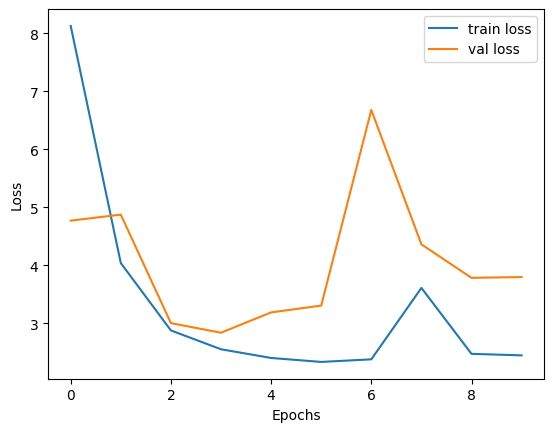

In [16]:
plt.plot(history_IV3_final.history['loss'], label='train loss')
plt.plot(history_IV3_final.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

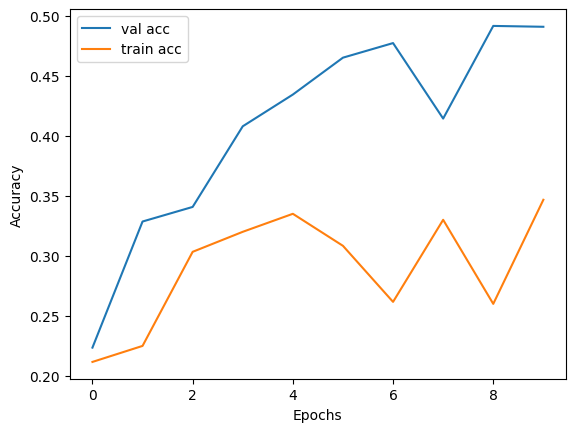

In [17]:
plt.plot(history_IV3_final.history['accuracy'], label='val acc')
plt.plot(history_IV3_final.history['val_accuracy'], label='train acc')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [18]:
model_IV3_5G_final = load_model('InceptionV3_5G_model.h5')


In [19]:
model_IV3_5G_final.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [20]:
test_generator = ImageDataGenerator(rescale = 1./255)
test_data_generator = test_generator.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

Found 600 images belonging to 5 classes.


In [21]:
predictions = model_IV3_5G_final.predict(test_data_generator, steps=test_steps_per_epoch)

19/19 [==============================] - 6s 276ms/step


In [22]:
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

[0 0 0 0 4 3 4 2 3 2 2 0 2 4 0 4 0 2 2 2 0 4 4 2 0 4 0 2 0 0 0 0 2 2 0 2 0
 4 2 0 2 0 2 4 0 2 0 2 2 0 0 0 2 0 0 2 3 0 0 0 2 0 2 1 2 3 0 0 0 0 0 0 2 2
 2 2 0 2 4 0 0 4 0 4 2 0 2 2 0 0 0 0 2 0 0 2 2 2 0 4 2 2 0 0 2 3 0 2 4 0 0
 2 2 2 0 4 2 0 0 0 4 4 4 4 4 4 4 3 4 4 4 0 3 3 0 4 4 2 4 4 0 4 4 4 0 0 0 4
 3 0 4 0 4 4 4 4 3 3 4 4 4 4 4 4 4 0 0 4 3 4 4 4 4 4 1 3 4 4 3 4 4 0 4 0 3
 3 3 4 3 4 4 4 4 4 3 1 4 4 4 4 3 4 4 4 0 4 3 3 2 4 4 3 4 2 4 1 3 4 4 4 4 0
 4 3 3 3 3 4 0 4 3 4 4 4 0 4 4 4 3 3 2 2 0 2 2 4 0 4 0 2 2 0 0 0 4 3 2 2 2
 2 2 0 4 0 4 0 0 2 2 0 0 0 0 0 0 4 0 0 0 2 2 0 0 2 0 4 2 0 0 2 4 2 2 4 0 2
 4 0 2 2 2 0 0 0 0 2 0 0 0 2 4 2 0 0 2 0 2 2 0 0 0 0 2 0 0 2 2 4 0 0 0 0 2
 0 2 2 0 0 0 2 1 0 3 0 2 2 0 0 2 2 0 4 2 3 0 0 2 2 0 0 4 0 3 4 3 4 4 0 4 4
 4 0 4 4 3 3 1 2 3 4 3 3 4 3 4 4 0 3 1 4 3 3 3 2 4 4 4 2 4 4 4 1 3 3 3 4 4
 3 4 4 0 3 4 4 3 4 4 4 4 4 4 4 4 3 3 4 3 3 3 3 3 4 4 4 4 3 4 4 4 3 4 4 4 3
 0 3 3 3 0 4 3 2 3 4 4 4 4 4 1 4 4 4 4 3 4 0 4 3 0 4 3 3 4 3 4 4 0 4 3 3 3
 4 4 4 4 4 4 0 4 0 3 4 4 

In [23]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())

In [24]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
cmat = confusion_matrix(true_classes, predicted_classes)
acc = accuracy_score(true_classes, predicted_classes)
print(report) 
print(cmat)
print(acc)

              precision    recall  f1-score   support

       16QAM       0.36      0.47      0.41       120
       32QAM       0.17      0.03      0.04       120
        4QAM       0.45      0.37      0.41       120
       64QAM       0.39      0.33      0.36       120
        8QAM       0.29      0.54      0.37       120

    accuracy                           0.35       600
   macro avg       0.33      0.35      0.32       600
weighted avg       0.33      0.35      0.32       600

[[56  1 43  5 15]
 [16  3  3 26 72]
 [59  1 44  3 13]
 [10  4  4 40 62]
 [14  9  3 29 65]]
0.3466666666666667


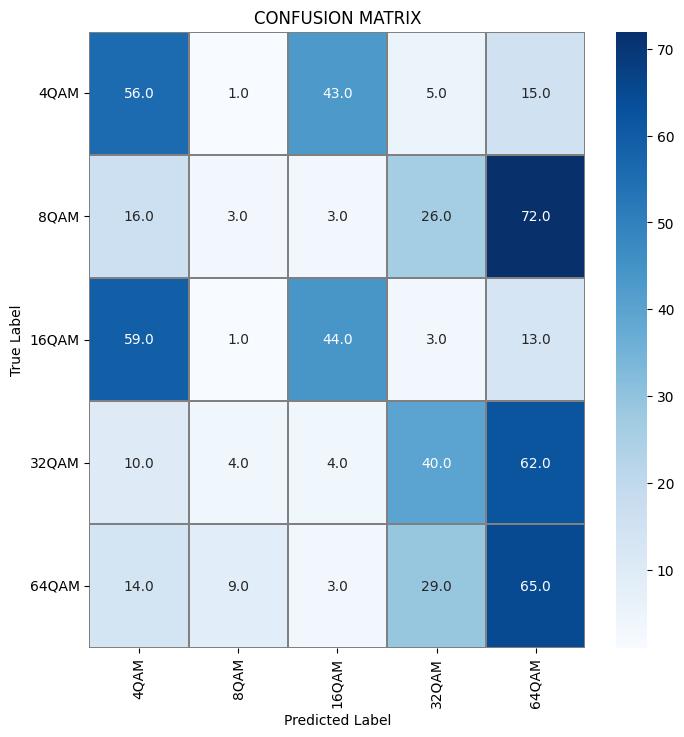

In [25]:
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Blues", linecolor="gray", fmt='.1f', ax=ax)

# Set labels and ticks
labels = ['4QAM', '8QAM', '16QAM', '32QAM', '64QAM']
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels, rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.title("CONFUSION MATRIX")
plt.show()